In [1]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# output_folder = 'output_control'
# nmda = h5py.File('./{}/inmda_report.h5'.format(output_folder),'r')
# v = h5py.File('./{}/v_report.h5'.format(output_folder),'r')
# hva = h5py.File('./{}/Ca_HVA.ica_report.h5'.format(output_folder),'r')
# lva = h5py.File('./{}/Ca_LVAst.ica_report.h5'.format(output_folder),'r')
# ih = h5py.File('./{}/Ih.ihcn_report.h5'.format(output_folder),'r')
# na = h5py.File('./{}/NaTa_t.gNaTa_t_report.h5'.format(output_folder),'r')

ben=False
if ben:
    dur_to_use = 150
    soma_id_to_use = 2
    %cd ../scripts/L5BaselineResults/
    v = np.array(h5py.File('v_report.h5','r')['report']['biophysical']['data'])
    hva = np.array(h5py.File('Ca_HVA.ica_report.h5','r')['report']['biophysical']['data'])
    lva = np.array(h5py.File('Ca_LVAst.ica_report.h5','r')['report']['biophysical']['data'])
    ih = np.array(h5py.File('Ih.ihcn_report.h5','r')['report']['biophysical']['data'])
    nmda = np.array(h5py.File('inmda_report.h5','r')['report']['biophysical']['data'])
    na = np.array(h5py.File('NaTa_t.gNaTa_t_report.h5','r')['report']['biophysical']['data'])
    spks = h5py.File('spikes.h5','r')
    spktimes = spks['spikes']['biophysical']['timestamps'][:]
    spkinds = np.sort((spktimes*10).astype(int))

    na_df = pd.read_csv('na.csv')
    ca_df = pd.read_csv('ca.csv')
    nmda_df = pd.read_csv('nmda.csv')
else:
    dur_to_use = 100
    soma_id_to_use = 0
    sim_directory = '2024-08-09-09-19-21-2500Segs_TripleNa/Complex_Np5'
    # sim_directory = '2024-07-24-15-59-37-STA/Complex_Np5'33
#'2024-07-12-12-17-52-STA/Complex_Np5'
    %cd ../scripts/
    import sys
    sys.path.append("../")
    sys.path.append("../Modules/")
    import analysis
    na = analysis.DataReader.read_data(sim_directory, "gNaTa_t_NaTa_t").T
    spks = analysis.DataReader.read_data(sim_directory, "soma_spikes")
    v = analysis.DataReader.read_data(sim_directory, "v").T
    hva = analysis.DataReader.read_data(sim_directory, "ica_Ca_HVA").T
    lva = analysis.DataReader.read_data(sim_directory, "ica_Ca_LVAst").T
    ih = analysis.DataReader.read_data(sim_directory, "ihcn_Ih").T
    nmda = analysis.DataReader.read_data(sim_directory, "i_NMDA").T
    # na = analysis.DataReader.read_data(sim_directory, "na")
    spktimes = spks[0][:]
    spkinds = np.sort((spktimes*10).astype(int))

    import os
    na_df = pd.read_csv(os.path.join(sim_directory,'na.csv'))
    ca_df = pd.read_csv(os.path.join(sim_directory,'ca.csv'))
    nmda_df = pd.read_csv(os.path.join(sim_directory,'nmda.csv'))

/home/drfrbc/Neural-Modeling/scripts


--No graphics will be displayed.


In [3]:
if ben:
    # segs = pd.read_csv('/Volumes/TOSHIBA EXT/L5NeuronSimulation_new/L5NeuronSimulation/MorphAnalysis/Segments.csv')
    segs = pd.read_csv('Segments.csv')
    segs_degrees = pd.read_csv('SegmentsDegrees.csv').groupby(['Type','Sec ID'])['Degrees'].max().reset_index()
    segs['segmentID'] = segs.index
    segs = segs.set_index(['Type','Sec ID']).join(segs_degrees.set_index(['Type','Sec ID'])).reset_index()

    segs['Sec ID'] = segs['Sec ID'].astype(int)
    segs['X'] = segs['X'].astype(float)
    segs['Elec_distanceQ'] = 'None'

    segs.loc[segs.Type=='dend','Elec_distanceQ'] = pd.qcut(segs.loc[segs.Type=='dend','Elec_distance'], 10, labels=False)
    segs.loc[segs.Type=='apic','Elec_distanceQ'] = pd.qcut(segs.loc[segs.Type=='apic','Elec_distance'], 10, labels=False)
else:
    import os
    segs = pd.read_csv(os.path.join(sim_directory, "segment_data.csv"))
    # make same
    segs['Sec ID'] = segs['idx_in_section_type']
    segs['Type'] = segs['section']
    segs['Coord X'] = segs['pc_0']
    segs['Coord Y'] = segs['pc_1']
    segs['Coord Z'] = segs['pc_2']
    elec_dist = pd.read_csv(os.path.join(sim_directory, f"elec_distance_{'soma'}.csv"))
    segs['Elec_distance'] = elec_dist['25_active']
    elec_dist = pd.read_csv(os.path.join(sim_directory, f"elec_distance_{'nexus'}.csv"))
    segs['Elec_distance_nexus'] = elec_dist['25_active']
    Xs = []
    for seg in segs['seg']:
        Xs.append(seg.split('(')[-1].split(')')[0])
    segs['X'] = Xs

    # continue
    segs['segmentID'] = segs.index

    segs['Sec ID'] = segs['Sec ID'].astype(int)
    segs['X'] = segs['X'].astype(float)
    segs['Elec_distanceQ'] = 'None'

    segs.loc[segs.Type=='dend','Elec_distanceQ'] = pd.qcut(segs.loc[segs.Type=='dend','Elec_distance'], 10, labels=False)
    segs.loc[segs.Type=='apic','Elec_distanceQ'] = pd.qcut(segs.loc[segs.Type=='apic','Elec_distance'], 10, labels=False)

In [4]:
# na_df = pd.read_csv('na_df.csv')
# na_df = pd.read_csv('na.csv')

In [5]:
for i in np.random.choice(na_df[(na_df.na_lower_bound>20) & (na_df.na_lower_bound<1400000)].index,10000):
    seg = na_df.loc[i,'segmentID']
    if not pd.isnull(na_df.loc[i,'na_lower_bound']):
        spkt = int(na_df.loc[i,'na_lower_bound'])
        trace = na[spkt-10:spkt+10,seg]#['report']['biophysical']['data'][spkt-10:spkt+10,seg]
        peak_value = np.max(trace)
        half_peak = peak_value/2
        duration = np.arange(0,20)[trace>half_peak] + spkt - 10
        na_df.loc[i,'duration_low'] = duration[0]
        na_df.loc[i,'duration_high'] = duration[-1]
        na_df.loc[i,'peak_value'] = peak_value
    else:
        na_df.loc[i,'duration_low'] = np.nan
        na_df.loc[i,'duration_high'] = np.nan
        na_df.loc[i,'peak_value'] = np.nan
        
na_df['duration'] = (na_df['duration_high'] - na_df['duration_low'] + 1)/10

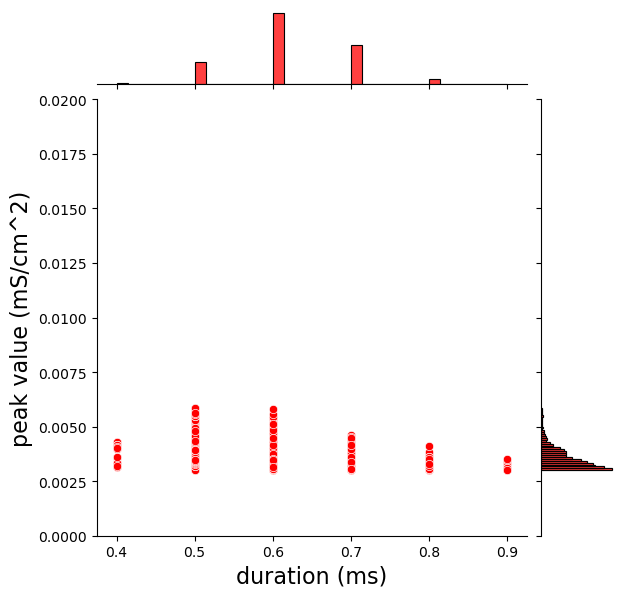

In [6]:
h = sns.jointplot(data=na_df[~pd.isnull(na_df.duration_low)], x="duration", y="peak_value",color='red')
h.set_axis_labels('duration (ms)', 'peak value (mS/cm^2)', fontsize=16)
h.ax_marg_y.set_ylim(0, 0.02)
plt.savefig('na_df.svg')

/tmp/ipykernel_2087414/1751950161.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  na_df_imhist[i,j] = na_df_gb[(na_df_gb.duration_bin==j) & (na_df_gb.mag_bin==i)]['duration']


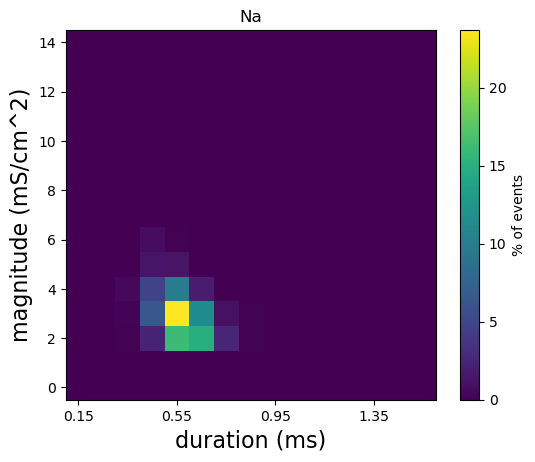

In [7]:
na_df_bin = na_df[~pd.isnull(na_df.duration_low)].reset_index(drop=True)

na_df_bin['duration_bin'] = pd.cut(na_df_bin['duration'], bins = np.arange(0.15,1.05,0.1), labels=False)
na_df_bin['mag_bin'] = pd.cut(na_df_bin['peak_value'], bins = 2*np.logspace(-3,-2,num=15), labels=False)

na_df_gb = na_df_bin.groupby(['duration_bin','mag_bin'])['duration'].count().reset_index()

na_df_imhist = np.zeros((15,15))
for i in np.arange(0,15):
    for j in np.arange(0,15):
        try:
            na_df_imhist[i,j] = na_df_gb[(na_df_gb.duration_bin==j) & (na_df_gb.mag_bin==i)]['duration']
        except:
            na_df_imhist[i,j] = 0
            
plt.imshow(100 * na_df_imhist / na_df_imhist.sum(), origin = 'lower')
plt.xlabel('duration (ms)', fontsize = 16)
plt.ylabel('magnitude (mS/cm^2)', fontsize = 16)
plt.xticks(ticks = [0,4,8,12], labels = [0.15, 0.55, 0.95, 1.35])
plt.title('Na')
#plt.yticks(ticks = [0,4,8,12], labels = [2e-3, 0.00386, 0.00746, 0.0144])
plt.colorbar(label='% of events')
plt.savefig('naspkdurations.svg')
#plt.xlim(0,10)
plt.show()

In [8]:
seg_na_df = na_df.groupby('segmentID')['na_lower_bound'].count().reset_index().rename(columns={'na_lower_bound':'num_na_spikes'})
segs_na_df = segs.set_index('segmentID').join(seg_na_df.set_index('segmentID'))
segs_na_df.loc[segs_na_df.num_na_spikes>1000,'num_na_spikes'] = 1000

/tmp/ipykernel_2087414/2319175143.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('jet')


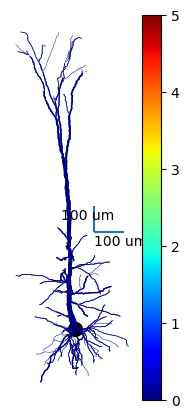

In [9]:
color_field = 'num_na_spikes'

fig, ax = plt.subplots(figsize=(2, 5))
import matplotlib
from matplotlib.colors import Normalize
cmap = matplotlib.cm.get_cmap('jet')
norm = matplotlib.colors.Normalize(vmin = 0, vmax = 5)

for i in segs_na_df[segs_na_df.Type=='apic']['Sec ID'].unique():
    section = segs_na_df[(segs_na_df.Type=='apic')&(segs_na_df['Sec ID']==i)]
    for j in section.index.tolist()[:-1]:
        ax.plot(section.loc[j:j+1,'Coord X'],
                 section.loc[j:j+1,'Coord Y'],
             color=cmap(norm(section.loc[j:j+1,color_field].mean()/dur_to_use)),
             linewidth = 1*section.loc[j:j+1,'Section_diam'].unique())
    
for i in segs_na_df[segs_na_df.Type=='dend']['Sec ID'].unique():
    section = segs_na_df[(segs_na_df.Type=='dend')&(segs_na_df['Sec ID']==i)]
    for j in section.index.tolist()[:-1]:
        ax.plot(section.loc[j:j+1,'Coord X'],
                 section.loc[j:j+1,'Coord Y'],
             color=cmap(norm(section.loc[j:j+1,color_field].mean()/dur_to_use)),
             linewidth = 1*section.loc[j:j+1,'Section_diam'].unique())
        
ax.scatter(segs_na_df[(segs_na_df.Type=='soma')&(segs_na_df['Sec ID']==0)].loc[soma_id_to_use,'Coord X'],
         segs_na_df[(segs_na_df.Type=='soma')&(segs_na_df['Sec ID']==0)].loc[soma_id_to_use,'Coord Y'],color='k',s=100)
ax.vlines(110,400,500)
ax.text(0,450,'100 um')
ax.hlines(400,110,210)
ax.text(110,350,'100 um')
# Create a dummy mappable for the colorbar
ax.set_xticks([])
ax.set_yticks([])

# Create a dummy mappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for the mappable
cbar = plt.colorbar(sm, ax=ax)
#cbar.ax.set_ylabel('log(elec_distance)', rotation=270)

#ax2.ax.set_title('log(elec_distance)',rotation=270)
plt.box(False)
plt.savefig('na_spk_segments.svg')

# NMDA

In [10]:
# nmda_df = pd.read_csv('nmda_df.csv')
# nmda_df = pd.read_csv('nmda.csv')

In [11]:
nmda_df['duration'] = (nmda_df['nmda_upper_bound'] - nmda_df['nmda_lower_bound'])/10

In [12]:
nmda_df['nmda_upper_bound']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
248517   NaN
248518   NaN
248519   NaN
248520   NaN
248521   NaN
Name: nmda_upper_bound, Length: 248522, dtype: float64

In [13]:
nmda_df['log_duration'] = np.log(nmda_df['duration'])
nmda_df['log_mag'] = np.log(np.abs(nmda_df['mag']))

/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


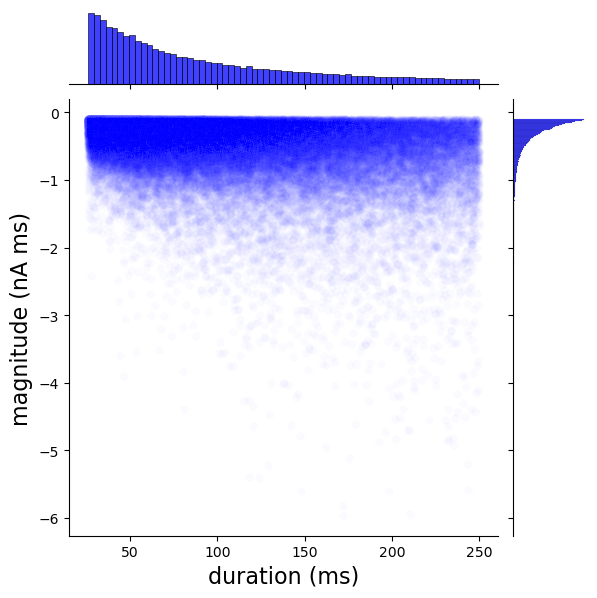

In [14]:
h = sns.jointplot(data=nmda_df[(nmda_df.mag<-0.1)&
                               (nmda_df.duration<250)&
                               (nmda_df.duration>26)], x="duration", y="mag",alpha=0.02, color='blue')
h.set_axis_labels('duration (ms)', 'magnitude (nA ms)', fontsize=16)
plt.savefig('nmda_df.svg')

In [15]:
nmda_df_bin = nmda_df[(nmda_df.mag<-0.1)&(nmda_df.duration<250)&(nmda_df.duration>26)].copy()

nmda_df_bin['duration_bin'] = pd.cut(nmda_df_bin['duration'], bins = 2*np.logspace(1.1,1.8,num=15), labels=False)
nmda_df_bin['mag_bin'] = pd.cut(-nmda_df_bin['mag'], bins = np.logspace(-1,0.5,num=15), labels=False)

nmda_df_gb = nmda_df_bin.groupby(['duration_bin','mag_bin'])['duration'].count().reset_index()

nmda_df_imhist = np.zeros((15,15))
for i in np.arange(0,15):
    for j in np.arange(0,15):
        try:
            nmda_df_imhist[i,j] = nmda_df_gb[(nmda_df_gb.duration_bin==j) & (nmda_df_gb.mag_bin==i)]['duration']
        except:
            nmda_df_imhist[i,j] = 0

/tmp/ipykernel_2087414/224386912.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nmda_df_imhist[i,j] = nmda_df_gb[(nmda_df_gb.duration_bin==j) & (nmda_df_gb.mag_bin==i)]['duration']


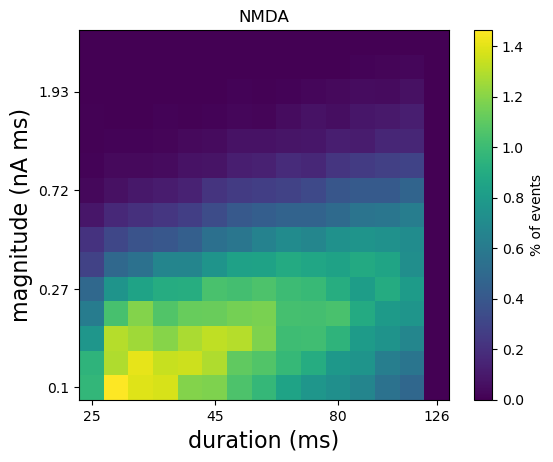

In [16]:
plt.imshow(100 * nmda_df_imhist / nmda_df_imhist.sum(), origin = 'lower')
plt.xlabel('duration (ms)', fontsize = 16)
plt.ylabel('magnitude (nA ms)', fontsize = 16)
plt.xticks(ticks = [0,5,10,14], labels = [25, 45, 80, 126])
plt.yticks(ticks = [0,4,8,12], labels = [0.10, 0.27, 0.72, 1.93])
plt.colorbar(label='% of events')
plt.title('NMDA')
plt.savefig('nmdaspkdurations.svg')
plt.show()

In [17]:
seg_nmda_df = nmda_df.groupby('segmentID')['nmda_lower_bound'].count().reset_index().rename(columns={'nmda_lower_bound':'num_nmda_spikes'})

segs_nmda_df = segs.set_index('segmentID').join(seg_nmda_df.set_index('segmentID'))


In [18]:
segs_nmda_df['Coord X']

segmentID
0       45.725557
1       58.736230
2       62.939716
3       66.929149
4       69.673642
          ...    
2506   -11.072411
2507   -12.957720
2508    45.725559
2509    45.725559
2510    45.725559
Name: Coord X, Length: 2511, dtype: float64

segmentID
1027   -2.303151
1028   -3.554566
1029   -4.910495
1030   -5.852709
1031   -6.340006
          ...   
0      -9.249733
1      -4.624868
2      -0.000010
3       4.624854
4       9.249712
Name: Coord X, Length: 2526, dtype: float64

/tmp/ipykernel_2087414/331611052.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('jet')


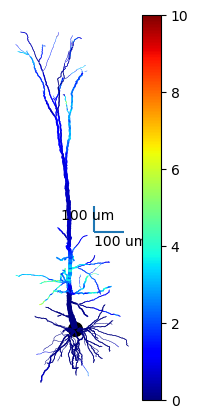

In [19]:
color_field = 'num_nmda_spikes'

fig, ax = plt.subplots(figsize=(2, 5))
import matplotlib
from matplotlib.colors import Normalize
cmap = matplotlib.cm.get_cmap('jet')
norm = matplotlib.colors.Normalize(vmin = 0, vmax = 10)

for i in segs_nmda_df[segs_nmda_df.Type=='apic']['Sec ID'].unique():
    section = segs_nmda_df[(segs_nmda_df.Type=='apic')&(segs_nmda_df['Sec ID']==i)]
    for j in section.index.tolist()[:-1]:
        ax.plot(section.loc[j:j+1,'Coord X'],
                 section.loc[j:j+1,'Coord Y'],
             color=cmap(norm(section.loc[j:j+1,color_field].mean()/dur_to_use)),
             linewidth = 1*section.loc[j:j+1,'Section_diam'].unique())
    
for i in segs_nmda_df[segs_nmda_df.Type=='dend']['Sec ID'].unique():
    section = segs_nmda_df[(segs_nmda_df.Type=='dend')&(segs_nmda_df['Sec ID']==i)]
    for j in section.index.tolist()[:-1]:
        ax.plot(section.loc[j:j+1,'Coord X'],
                 section.loc[j:j+1,'Coord Y'],
             color=cmap(norm(section.loc[j:j+1,color_field].mean()/dur_to_use)),
             linewidth = 1*section.loc[j:j+1,'Section_diam'].unique())
        
ax.scatter(segs_nmda_df[(segs_nmda_df.Type == 'soma') & (segs_nmda_df['Sec ID'] == 0)].loc[soma_id_to_use, 'Coord X'],
           segs_nmda_df[(segs_nmda_df.Type == 'soma') & (segs_nmda_df['Sec ID'] == 0)].loc[soma_id_to_use, 'Coord Y'],
           color='k', s=100)
ax.vlines(110, 400, 500)
ax.text(0, 450, '100 um')
ax.hlines(400, 110, 210)
ax.text(110, 350, '100 um')
ax.set_xticks([])
ax.set_yticks([])

# Create a dummy mappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for the mappable
cbar = plt.colorbar(sm, ax=ax)

plt.box(False)
plt.savefig('nmda_spk_segments.svg')

# Ca

In [20]:
# ca_df = pd.read_csv('ca_df.csv')
# ca_df = pd.read_csv('ca.csv')

In [21]:
ca_df['dist_from_soma_spike'] = ca_df['ca_lower_bound'].apply(lambda x: np.min(np.abs(x-spkinds)))
ca_df['duration'] = (ca_df['ca_upper_bound'] - ca_df['ca_lower_bound'])/10
ca_df['mag_dur'] = ca_df['mag']/ca_df['duration']

In [22]:
ca_df = ca_df[(ca_df.mag<-0.1)&
                           (ca_df.duration<250)&
                           (ca_df.duration>26)&
                           (ca_df.dist_from_soma_spike>50)&
                           (ca_df.mag_dur<-0.006)]

In [23]:
ca_df_bin = ca_df[(ca_df.mag<-0.1)&
                           (ca_df.duration<250)&
                           (ca_df.duration>26)&
                           (ca_df.dist_from_soma_spike>50)&
                           (ca_df.mag_dur<-0.006)].copy()

ca_df_bin['duration_bin'] = pd.cut(ca_df_bin['duration'], bins = 2*np.logspace(1.1,1.5,num=15), labels=False)
ca_df_bin['mag_bin'] = pd.cut(-ca_df_bin['mag'], bins = np.linspace(0.1,1.4,num=15), labels=False)

ca_df_gb = ca_df_bin.groupby(['duration_bin','mag_bin'])['duration'].count().reset_index()

ca_df_imhist = np.zeros((15,15))
for i in np.arange(0,15):
    for j in np.arange(0,15):
        try:
            ca_df_imhist[i,j] = ca_df_gb[(ca_df_gb.duration_bin==j) & (ca_df_gb.mag_bin==i)]['duration']
        except:
            ca_df_imhist[i,j] = 0

/tmp/ipykernel_2087414/3078549579.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ca_df_imhist[i,j] = ca_df_gb[(ca_df_gb.duration_bin==j) & (ca_df_gb.mag_bin==i)]['duration']


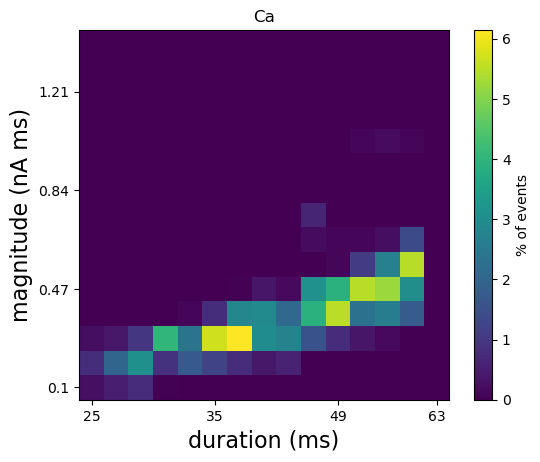

In [24]:
plt.imshow(100 * ca_df_imhist / ca_df_imhist.sum(), origin = 'lower')
plt.xlabel('duration (ms)', fontsize = 16)
plt.ylabel('magnitude (nA ms)', fontsize = 16)
plt.xticks(ticks = [0,5,10,14], labels = [25, 35, 49, 63])
plt.yticks(ticks = [0,4,8,12], labels = [0.10, 0.47, 0.84, 1.21])
plt.colorbar(label='% of events')
plt.title('Ca')
plt.savefig('caspkdurations.svg')
plt.show()

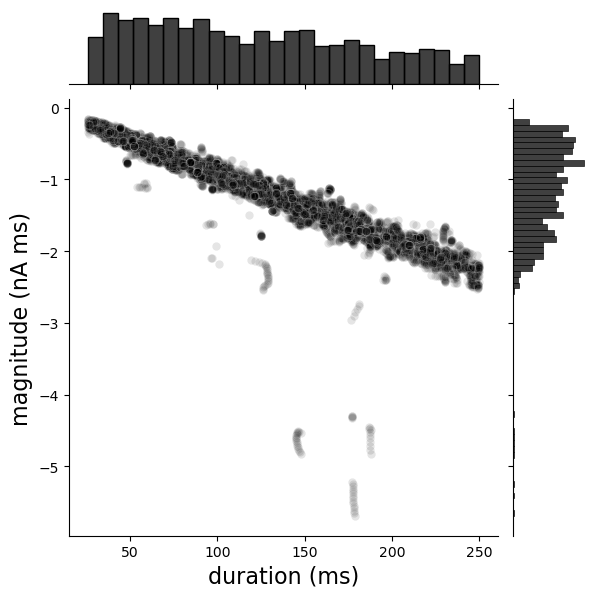

In [25]:
h = sns.jointplot(data=ca_df, x="duration", y="mag",alpha=0.1, color='black')
h.set_axis_labels('duration (ms)', 'magnitude (nA ms)', fontsize=16)
plt.savefig('ca_df.svg')

In [26]:
ca_df = ca_df[(ca_df.mag<-0.1)&
                           (ca_df.duration<250)&
                           (ca_df.duration>26)&
                           (ca_df.dist_from_soma_spike>50)]

seg_ca_df = ca_df.groupby('segmentID')['ca_lower_bound'].count().reset_index().rename(columns={'ca_lower_bound':'num_ca_spikes'})

segs_ca_df = segs.set_index('segmentID').join(seg_ca_df.set_index('segmentID')).reset_index()


<Axes: >

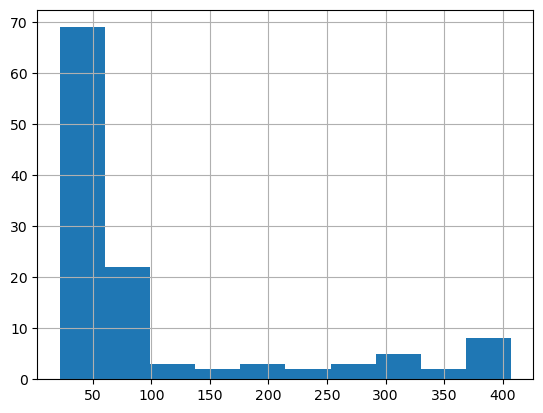

In [27]:
segs_ca_df['num_ca_spikes'].hist()

In [28]:
segs_ca_df_plot = segs_ca_df.copy()
#segs_ca_df_plot.loc[(segs_ca_df_plot['Coord Y']<630)|(segs_ca_df_plot['Coord Y']>830),'num_ca_spikes'] = 0

In [29]:
# segs_ca_df[(segs_ca_df.HVA_gbar>0.0004)&(segs_ca_df.Type=='apic')]['Coord Y'].min()

In [30]:
# segs_ca_df[(segs_ca_df.HVA_gbar>0.0004)&(segs_ca_df.Type=='apic')]['Coord Y'].max()

In [31]:
segs_ca_df_plot[(segs_ca_df_plot.Type=='soma')&(segs_ca_df_plot['Sec ID']==0)]

,segmentID,Unnamed: 0,section,idx_in_section_type,seg_half_seg_RA,L,seg,pseg,Section_L,Section_diam,...,Sec ID,Type,Coord X,Coord Y,Coord Z,Elec_distance,Elec_distance_nexus,X,Elec_distanceQ,num_ca_spikes
0,0,0,soma,0,0.081276,23.169408,L5PCtemplate[0].soma[0](0.5),NaN,23.169408,13.471518,...,0,soma,45.725557,18.343678,-50.25,1.0,0.290565,0.5,None,NaN


/tmp/ipykernel_2087414/22615593.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('jet')


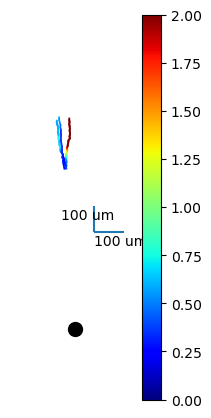

In [32]:
color_field = 'num_ca_spikes'
if ben: soma_id_to_use_ca = 2523 
else: soma_id_to_use_ca =  0

gig, ax = plt.subplots(figsize=(2,5))
import matplotlib
from matplotlib.colors import Normalize
cmap = matplotlib.cm.get_cmap('jet')
norm = matplotlib.colors.Normalize(vmin = 0, vmax = 2)

for i in segs_ca_df_plot[segs_ca_df_plot.Type=='apic']['Sec ID'].unique():
    section = segs_ca_df_plot[(segs_ca_df_plot.Type=='apic')&(segs_ca_df_plot['Sec ID']==i)]
    for j in section.index.tolist()[:-1]:
        ax.plot(section.loc[j:j+1,'Coord X'],
                 section.loc[j:j+1,'Coord Y'],
             color=cmap(norm(section.loc[j:j+1,color_field].mean()/dur_to_use)),
             linewidth = 1*section.loc[j:j+1,'Section_diam'].unique())
    
for i in segs_ca_df_plot[segs_ca_df_plot.Type=='dend']['Sec ID'].unique():
    section = segs_ca_df_plot[(segs_ca_df_plot.Type=='dend')&(segs_ca_df_plot['Sec ID']==i)]
    for j in section.index.tolist()[:-1]:
        ax.plot(section.loc[j:j+1,'Coord X'],
                 section.loc[j:j+1,'Coord Y'],
             color=cmap(norm(section.loc[j:j+1,color_field].mean()/dur_to_use)),
             linewidth = 1*section.loc[j:j+1,'Section_diam'].unique())
        
ax.scatter(segs_ca_df_plot[(segs_ca_df_plot.Type=='soma')&(segs_ca_df_plot['Sec ID']==0)].loc[soma_id_to_use_ca,'Coord X'],
         segs_ca_df_plot[(segs_ca_df_plot.Type=='soma')&(segs_ca_df_plot['Sec ID']==0)].loc[soma_id_to_use_ca,'Coord Y'],color='k',s=100)
ax.vlines(110,400,500)
ax.text(0,450,'100 um')
ax.hlines(400,110,210)
ax.text(110,350,'100 um')
ax.set_xticks([])
ax.set_yticks([])

# Create a dummy mappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for the mappable
cbar = plt.colorbar(sm, ax=ax)
#cbar.ax.set_ylabel('log(elec_distance)', rotation=270)

#ax2.ax.set_title('log(elec_distance)',rotation=270)
plt.box(False)
plt.savefig('ca_spk_segments.svg')

In [33]:
import pandas as pd

# Initialize an empty list to collect rows before converting them into a DataFrame
rows = []

# Define the spike types and their corresponding DataFrames and columns
spike_types = {
    'num_nmda_spikes': ('Total_NMDA_Spikes', segs_nmda_df),
    'num_na_spikes': ('Total_NA_Spikes', segs_na_df),
    'num_ca_spikes': ('Total_CA_Spikes', segs_ca_df)
}

# Calculate the total number of spikes for each segment type and spike type
for seg_type in ['apic', 'dend']:
    row = {'Segment_Type': seg_type}
    for spike_field, (column_name, df) in spike_types.items():
        total_spikes = df[df.Type == seg_type][spike_field].sum()
        row[column_name] = round(total_spikes / dur_to_use, 1)
    rows.append(row)

# Convert the list of rows into a DataFrame
spike_table = pd.DataFrame(rows)

# Display the table
print(spike_table)

  Segment_Type  Total_NMDA_Spikes  Total_NA_Spikes  Total_CA_Spikes
0         apic             2409.3              0.1            121.0
1         dend               66.7             26.1              0.0


Ben's cell
  Segment_Type  Total_NMDA_Spikes  Total_NA_Spikes  Total_CA_Spikes
0         apic             569870           307402           7445.0
1         dend             471602           329009              0.0
Refactored
  Segment_Type  Total_NMDA_Spikes  Total_NA_Spikes  Total_CA_Spikes
0         apic             240928                9          12097.0
1         dend               6674             2610              0.0


Per second Ben
  Segment_Type  Total_NMDA_Spikes  Total_NA_Spikes  Total_CA_Spikes
0         apic             3799.1           2049.3             49.6
1         dend             3144.0           2193.4              0.0
Per second Refactored
  Segment_Type  Total_NMDA_Spikes  Total_NA_Spikes  Total_CA_Spikes
0         apic             2409.3              0.1            121.0
1         dend               66.7             26.1              0.0

In [34]:
segs_lt = ca_df[(ca_df.duration<50) & (ca_df.mag<-0.5) & (ca_df.dist_from_soma_spike>50) & (ca_df.mag_dur<-0.006)]['segmentID'].unique()
segs_gt = ca_df[(ca_df.duration<50) & (ca_df.mag<-0.5) & (ca_df.dist_from_soma_spike>50) & (ca_df.mag_dur>-0.006)]['segmentID'].unique()

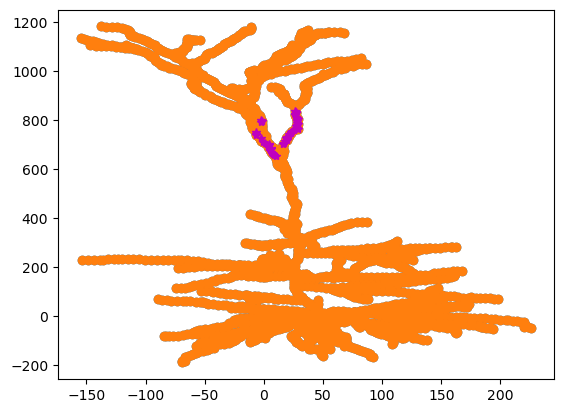

In [35]:
plt.scatter(segs['Coord X'], segs['Coord Y'])
plt.plot(segs.loc[segs.segmentID.isin(segs_lt),'Coord X'],segs.loc[segs.segmentID.isin(segs_lt),'Coord Y'],'m*')
plt.scatter(segs['Coord X'], segs['Coord Y'])
plt.plot(segs.loc[segs.segmentID.isin(segs_gt),'Coord X'],segs.loc[segs.segmentID.isin(segs_gt),'Coord Y'],'r*')

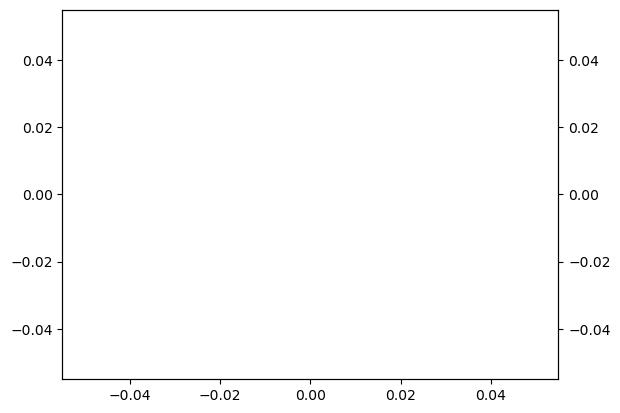

In [36]:
seg = 1852
low = 1461407
high = 1461703
# plt.plot(hva['report']['biophysical']['data'][low-1000:high+1000,seg]+\
#          lva['report']['biophysical']['data'][low-1000:high+1000,seg]+\
#          ih['report']['biophysical']['data'][low-1000:high+1000,seg])
plt.plot(hva[low-1000:high+1000,seg]+\
         lva[low-1000:high+1000,seg]+\
         ih[low-1000:high+1000,seg])
plt.twinx()
plt.plot(v[low-1000:high+1000,seg],color='k')#['report']['biophysical']['data'][low-1000:high+1000,seg],color='k')
plt.plot(v[low-1000:high+1000,0],color='k',alpha=0.2)#['report']['biophysical']['data'][low-1000:high+1000,0],color='k',alpha=0.2)

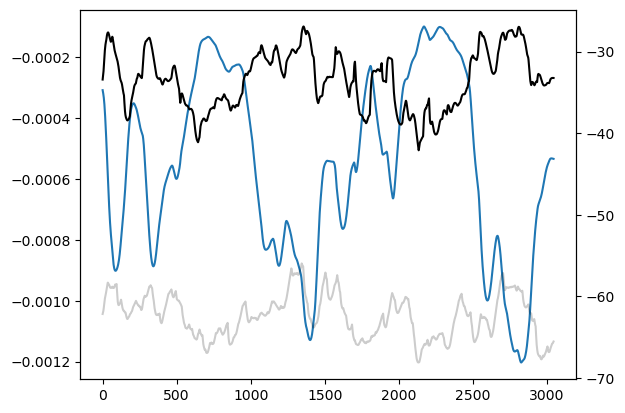

In [37]:
# plt.plot(hva['report']['biophysical']['data'][162647-1000:163693+1000,1070]+\
#          lva['report']['biophysical']['data'][162647-1000:163693+1000,1070]+\
#          ih['report']['biophysical']['data'][162647-1000:163693+1000,1070])
plt.plot(hva[162647-1000:163693+1000,1070]+\
         lva[162647-1000:163693+1000,1070]+\
         ih[162647-1000:163693+1000,1070])
plt.twinx()
plt.plot(v[162647-1000:163693+1000,1070],color='k')#['report']['biophysical']['data'][162647-1000:163693+1000,1070],color='k')
plt.plot(v[162647-1000:163693+1000,0],color='k',alpha=0.2)#['report']['biophysical']['data'][162647-1000:163693+1000,0],color='k',alpha=0.2)

In [38]:
from functools import partial
import scipy.stats as st

levy_dist = partial(st.levy_stable.rvs, alpha=1.37, beta=-1.00, loc=0.92, scale=0.44, size=1)
levy_dist2 = partial(st.levy_stable.rvs, alpha=1.37, beta=-1.00, loc=0.92/2, scale=0.44, size=1)
levy_dist3 = partial(st.levy_stable.rvs, alpha=1.37, beta=-1.00, loc=0.92/10, scale=0.44, size=1)

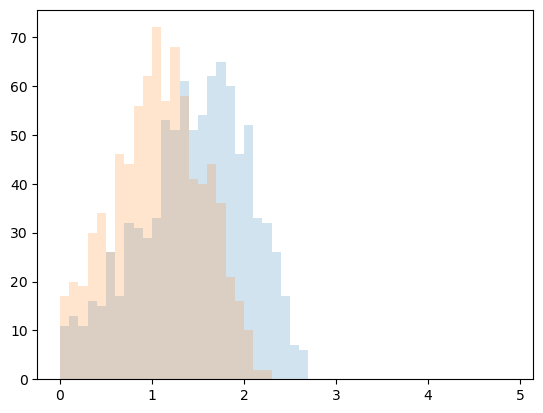

In [39]:
x = levy_dist(size=1000)
x[x<0] = 0
plt.hist(x[x>0],bins=np.arange(0,5,.1),alpha=0.2)
x = levy_dist2(size=1000)
x[x<0] = 0
plt.hist(x[x>0],bins=np.arange(0,5,.1),alpha=0.2)
#x = levy_dist3(size=1000)
#x[x<0] = 0
#plt.hist(x[x>0],bins=np.arange(0,5,.1),alpha=0.2)
plt.show()

In [40]:
# f = h5py.File('exc_stim_spikes_control.h5','r')

In [41]:
# from raster_maker import SonataWriter

In [42]:
# df = pd.DataFrame(np.concatenate((f['spikes']['exc_stim']['node_ids'][:].reshape(-1,1),
#                              f['spikes']['exc_stim']['timestamps'][:].reshape(-1,1)),axis=1),
#                   columns=['node_id','timestamps'])

In [43]:
# fname = 'exc_stim_spikes_50p.h5'
# writer = SonataWriter(fname, ["spikes", "exc_stim"], ["timestamps", "node_ids"], [np.float, np.int])

# for i in np.unique(f['spikes']['exc_stim']['node_ids'][:]):
#     #import pdb; pdb.set_trace()
#     ts = df.loc[df.node_id==i,'timestamps'].values
#     ts_redux = np.random.choice(ts,int(ts.shape[0]*0.5))
#     if len(ts_redux)==0:
#         ts_redux = ts
#     writer.append_repeat("node_ids", i + 0, len(ts_redux))
#     writer.append_ds(ts_redux + 0, "timestamps")

In [44]:
# writer.close()

In [45]:
# f = h5py.File('exc_stim_spikes_control.h5','r')
# ex = h5py.File('exc_stim_spikes.h5','r')

In [46]:
# df = pd.DataFrame(np.concatenate((f['spikes']['exc_stim']['node_ids'][:].reshape(-1,1), 
#                                   f['spikes']['exc_stim']['timestamps'][:].reshape(-1,1)),axis=1),
#                   columns=['node_ids','timestamps'])

# df2 = pd.DataFrame(np.concatenate((ex['spikes']['exc_stim']['node_ids'][:].reshape(-1,1), 
#                                   ex['spikes']['exc_stim']['timestamps'][:].reshape(-1,1)),axis=1),
#                   columns=['node_ids','timestamps'])


In [47]:
# df2[df2.node_ids==5135].shape

In [48]:
# df[df.node_ids==5135].shape

In [49]:
# f['spikes']['exc_stim']['node_ids'], f['spikes']['exc_stim']['timestamps']

In [50]:
# ex['spikes']['exc_stim']['node_ids'], ex['spikes']['exc_stim']['timestamps']

In [51]:
# fname = 'exc_stim_spikes_150p.h5'
# writer = SonataWriter(fname, ["spikes", "exc_stim"], ["timestamps", "node_ids"], [np.float, np.int])

# for i in np.arange(0,np.unique(f['spikes']['exc_stim']['node_ids'][:]).shape[0]):
#     ts = df.loc[df.node_id==i,'timestamps'].values
#     extras = np.random.choice(ts,int(ts.shape[0]*0.5)) + np.random.uniform(low=-10,high=10,size=int(ts.shape[0]*0.5))
#     ts_redux = np.concatenate((ts,extras))

#     writer.append_repeat("node_ids", i + 0, len(ts_redux))
#     writer.append_ds(ts_redux + 0, "timestamps")
    

In [52]:
# f50 = h5py.File('exc_stim_spikes_50p.h5','r')
# f150 = h5py.File('exc_stim_spikes_150p.h5','r')

In [53]:
# np.median(pd.DataFrame(f['spikes']['exc_stim']['node_ids'][:])[0].value_counts().values/30)

In [54]:
# np.median(pd.DataFrame(f50['spikes']['exc_stim']['node_ids'][:])[0].value_counts().values/30)

In [55]:
# np.median(pd.DataFrame(f150['spikes']['exc_stim']['node_ids'][:])[0].value_counts().values/30)

In [56]:
# y,e = np.histogram(pd.DataFrame(f['spikes']['exc_stim']['node_ids'][:])[0].value_counts().values/30,
#          bins=np.arange(0,20,0.2))
# plt.plot(e[1:],y/np.sum(y))
# y,e = np.histogram(pd.DataFrame(f50['spikes']['exc_stim']['node_ids'][:])[0].value_counts().values/30,
#          bins=np.arange(0,20,0.2))
# plt.plot(e[1:],y/np.sum(y))
# y,e = np.histogram(pd.DataFrame(f150['spikes']['exc_stim']['node_ids'][:])[0].value_counts().values/30,
#          bins=np.arange(0,20,0.2))
# plt.plot(e[1:],y/np.sum(y))
# plt.show()

In [57]:
# f = h5py.File('./output/spikes.h5','r')
# g = h5py.File('./output_control/spikes.h5','r')

In [58]:
# f['spikes']['biophysical']['timestamps'][0:10], g['spikes']['biophysical']['timestamps'][0:10]

In [59]:
# f = h5py.File('exc_stim_spikes.h5','r')

In [60]:
# f['spikes']['exc_stim']['node_ids'], f['spikes']['exc_stim']['timestamps']

In [61]:
# g = h5py.File('exc_stim_spikes_control.h5','r')

In [62]:
# g['spikes']['exc_stim']['node_ids'], g['spikes']['exc_stim']['timestamps']

In [63]:
# np.unique(g['spikes']['exc_stim']['node_ids'][:])

In [64]:
# np.unique(f['spikes']['exc_stim']['node_ids'][:])

In [65]:
# f = h5py.File('./output_low/exc_stim_spikes.h5','r')
# g = h5py.File('./output_lowmed/exc_stim_spikes.h5','r')
# h = h5py.File('./output_med/exc_stim_spikes.h5','r')
# i = h5py.File('./output_medhigh/exc_stim_spikes.h5','r')
# j = h5py.File('./output_high/exc_stim_spikes.h5','r')

# fo = h5py.File('./output_low/spikes.h5','r')
# go = h5py.File('./output_lowmed/spikes.h5','r')
# ho = h5py.File('./output_med/spikes.h5','r')
# io = h5py.File('./output_medhigh/spikes.h5','r')
# jo = h5py.File('./output_high/spikes.h5','r')

In [66]:
# fo['spikes']['biophysical']['timestamps'][:].shape[0]/30

In [67]:
# df = pd.DataFrame(f['spikes']['exc_stim']['node_ids'][:],columns=['node_ids'])
# y,_ = np.histogram(df['node_ids'].value_counts().values/30,bins=np.arange(0,30,0.5))
# plt.plot(np.arange(0,30,0.5)[1:],
#          y/np.sum(y),
#          label='{x:0.2f}'.format(x=fo['spikes']['biophysical']['timestamps'][:].shape[0]/30))

# df = pd.DataFrame(g['spikes']['exc_stim']['node_ids'][:],columns=['node_ids'])
# y,_ = np.histogram(df['node_ids'].value_counts().values/30,bins=np.arange(0,30,0.5))
# plt.plot(np.arange(0,30,0.5)[1:],
#          y/np.sum(y),
#          label='{x:0.2f}'.format(x=go['spikes']['biophysical']['timestamps'][:].shape[0]/30))

# df = pd.DataFrame(h['spikes']['exc_stim']['node_ids'][:],columns=['node_ids'])
# y,_ = np.histogram(df['node_ids'].value_counts().values/30,bins=np.arange(0,30,0.5))
# plt.plot(np.arange(0,30,0.5)[1:],
#          y/np.sum(y),
#          label='{x:0.2f}'.format(x=ho['spikes']['biophysical']['timestamps'][:].shape[0]/30))

# df = pd.DataFrame(i['spikes']['exc_stim']['node_ids'][:],columns=['node_ids'])
# y,_ = np.histogram(df['node_ids'].value_counts().values/30,bins=np.arange(0,30,0.5))
# plt.plot(np.arange(0,30,0.5)[1:],
#          y/np.sum(y),
#          label='{x:0.2f}'.format(x=io['spikes']['biophysical']['timestamps'][:].shape[0]/30))

# df = pd.DataFrame(j['spikes']['exc_stim']['node_ids'][:],columns=['node_ids'])
# y,_ = np.histogram(df['node_ids'].value_counts().values/30,bins=np.arange(0,30,0.5))
# plt.plot(np.arange(0,30,0.5)[1:],
#          y/np.sum(y),
#          label='{x:0.2f}'.format(x=jo['spikes']['biophysical']['timestamps'][:].shape[0]/30))

# plt.xlabel('input exc. firing rate (Hz)')
# plt.ylabel('proportion')

# plt.legend(title='output firing rate (Hz)')

In [68]:
# plt.plot([0.50,0.73,5.20,12.93,19.23])

In [69]:

# f['spikes']['biophysical']['timestamps'].shape[0]/30,\
# g['spikes']['biophysical']['timestamps'].shape[0]/30,\
# h['spikes']['biophysical']['timestamps'].shape[0]/30,\
# i['spikes']['biophysical']['timestamps'].shape[0]/30,\
# j['spikes']['biophysical']['timestamps'].shape[0]/30

In [70]:
# h['spikes']['biophysical']['timestamps'].shape[0]/30

In [71]:
# plt.plot(i['report']['biophysical']['data'][50000:100000,0])